## Graded Challenge 3
Nama : Rahmat Fadhli Syauqi

Batch : 11


Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Practical Statistics.

## Assignment Instructions

Graded Challenge 1 dikerjakan dalam format notebook dengen beberapa kriteria wajib di bawah ini:

1. Library yang digunakan adalah Numpy, Pandas, dan Scipy.
2. Project dinyatakan selesai dan diterima untuk dinilai jika saat dilakukan Run All pada notebook, semua cell berhasil tereksekusi sampai akhir.
3. Isi notebook harus mengikuti outline di bawah ini:
- Perkenalan\ Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.
- Import pustaka yang dibutuhkan\ Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.
- Data Loading\ Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.
- Data Cleaning\ Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.
- Explorasi Data\ Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.
- Measure of Central Tendency
- Measure of Variance
- Hyphotesis Testing
- Pengambilan Kesimpulan\ Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.
4. Notebook harus diupload dalam akun GitHub masing-masing siswa untuk selanjutnya dinilai.

## Assignment Objectives
Graded Challenge 3 ini dibuat guna mengevaluasi kPractical Statistics sebagai berikut:

- Mampu memuat data dengan Pandas
- Mampu menangani missing values pada dataset
- Mampu melakukan manipulasi kolom
- Mampu membuat query terhadap dataset
- Mampu melakukan grouping terhadap dataset
- Mampu melakukan visualisasi sederhana menggunakan Pandas

## I. Import Pustaka

In [1]:
# modul yang digunakan
import pandas as pd
import numpy as np

# transformasi statistik
from scipy import stats
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis

# modul plotting visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
plt.style.use('seaborn-darkgrid')
%matplotlib inline

## II. Data Loading

In [2]:
#Menampilkan 5 data teratas
df = pd.read_csv("ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
#Melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
#Melihat ukuran data
df.shape

(378661, 15)

Dari dataframe diatas , dataset ini mengandung 378657 baris data dan 15 kolom.

## III. Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [5]:
#Melihat kolom yang memiliki data missing value
df.isnull().sum() 

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Dari hasil diatas, dapat dilihat tedapat 4 data yang kosong pada bagian kolom **name** dan 3797 data pada **usd_pledged** 

Dari hasil pencarian diatas terbukti 4 data pada bagian kolom **name** terdapat kekosongan data, dari hal ini kita bisa melakukan replacing dengan penyebutan **Unknown Project**.

In [6]:
#Replacing missing value pada kolom 'name' menjadi 'Unknown Project'
df['name'].fillna('Unknown Project', inplace = True)

Kali ini, akan melakukan pengisian data yang kosong pada nilai **usd pledged** dengan nilai yang sama pada **usd pledge real**.

In [7]:
#Menunjukkan missing value pada kolom 'usd pledged'
df.loc[
    (df['usd pledged'].isnull())
].sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
350302,854648390,"Crystal Radio, Vinyl, Wooden Record, Playing C...",Music,Music,USD,2016-04-26,6500.0,2016-03-17 20:04:13,8889.0,successful,0,"N,0""",NaN,8889.00,6500.00
220490,2123028188,game laced the mixtape/ep,Music,Music,USD,2016-05-03,2000.0,2016-03-27 09:51:16,0.0,failed,0,"N,0""",NaN,0.00,2000.00
199536,2016163729,King James Entertainment Project,Music,Music,USD,2015-07-30,5000.0,2015-06-30 23:37:35,0.0,undefined,0,"N,0""",NaN,0.00,5000.00
15540,107859454,What The Fox Studios,Music,Music,GBP,2015-06-26,5000.0,2015-05-27 20:52:11,30.0,undefined,0,"N,0""",NaN,47.18,7863.24
332342,763044388,Record Cleaning Solution By Urban Vinyl,Music,Music,USD,2015-04-10,5000.0,2015-03-11 07:37:30,46.0,undefined,0,"N,0""",NaN,46.00,5000.00


In [8]:
df['usd pledged'].fillna(df['usd_pledged_real'], inplace = True)
df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Dari hasil diatas kita dapat melihat pada bagian kolom **country** ketidakadaaan informasi seputar asal **country** yang berisi N,0" pada bagian project tersebut, maka dengan kita bisa melakukan replacing kembali dengan kolom **currency**.

In [9]:
#Replacing isi data 'N,0"' menjadi data yang kosong
df['country'].replace('N,0"', np.NaN, inplace=True)
#Replacing data NaN dengan berdasarkan dengan mata uang negara tersebut
df['country'].fillna(df['currency'], inplace=True)

Setelah melakukan proses cleaning pada missing value, pengantian dataframe awal menjadi dataframe yang baru.

In [10]:
#variabel dataframe setelah pembersihan
df_new = df

## IV. Data Exploration

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Dari hal ini kita akan mencari tahu bagaimana perbandingan setiap project yang berhasil dan gagal.

In [11]:
#Menampil 5 data teratas
df_new.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [12]:
#Menampilkan 5 data terbawah
df_new.tail(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [13]:
#Melihat 5 peringkat dari usd pledged tertinggi
df_new.sort_values('usd pledged',ascending=False).head(5)  

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0
250254,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,50000.0,2014-07-08 10:14:37,13285226.36,successful,62642,US,13285226.36,13285226.36,50000.0
216629,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,1000000.0,2016-05-24 15:49:52,12779843.49,successful,66673,US,12779843.49,12779843.49,1000000.0
282416,506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,100000.0,2012-04-11 06:59:04,10266845.74,successful,68929,US,10266845.74,10266845.74,100000.0
293861,565687737,The World's Best TRAVEL JACKET with 15 Feature...,Product Design,Design,USD,2015-09-03,20000.0,2015-07-07 13:52:34,9192055.66,successful,44949,US,9192055.66,9192055.66,20000.0


In [14]:
#Melihat 5 peringkat dari usd pledged terendah
df_new.sort_values('usd pledged',ascending=False).tail(5)  

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
95890,1487427501,IDE-Plugins for the Galenframework,Software,Technology,EUR,2016-06-12,6000.0,2016-04-13 06:14:28,0.0,failed,0,DE,0.0,0.0,6752.42
95893,1487433816,Play Alll 9- The Baseball Player's Brand,Apparel,Fashion,USD,2016-12-07,10000.0,2016-11-07 18:26:25,451.0,failed,7,US,0.0,451.0,10000.00
95896,1487455241,Cat's Club,Fashion,Fashion,EUR,2015-12-24,50000.0,2015-11-24 22:00:59,0.0,failed,0,IT,0.0,0.0,54735.14
95897,1487460610,Real-Time Application Messaging (Canceled),Software,Technology,EUR,2016-01-30,50000.0,2015-12-01 11:48:19,0.0,canceled,0,IT,0.0,0.0,56009.86
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95


In [15]:
#Menampilkan value pada bagian kolom Category & main_category
print('Unique Category : ',df_new['category'].unique())
print('Unique main_category : ',df_new['main_category'].unique())

Unique Category :  ['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Tabletop Games' 'Design' 'Comic Books' 'Art Books'
 'Fashion' 'Childrenswear' 'Theater' 'Comics' 'DIY' 'Webseries'
 'Animation' 'Food Trucks' 'Public Art' 'Illustration' 'Photography' 'Pop'
 'People' 'Art' 'Family' 'Fiction' 'Accessories' 'Rock' 'Hardware'
 'Software' 'Weaving' 'Gadgets' 'Web' 'Jazz' 'Ready-to-wear' 'Festivals'
 'Video Games' 'Anthologies' 'Publishing' 'Shorts' 'Electronic Music'
 'Radio & Podcasts' 'Apps' 'Cookbooks' 'Apparel' 'Metal' 'Comedy'
 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting' 'World Music'
 'Photobooks' 'Drama' 'Architecture' 'Young Adult' 'Latin' 'Mobile Games'
 'Flight' 'Fine Art' 'Action' 'Playing Cards' 'Makerspaces' 'Punk'
 'Thrillers' "Children's Books" 'Audio' 'Performance Art' 'Ceramics'
 'Vegan' 'Graphic Novels' 'Fabrication Tools' 'Performances' 'Sculpture'
 'So

In [16]:
#Menampilkan jumlah total dari tiap kolom
print('Unique category : ', df_new['category'].nunique())
print('Unique main_category : ', df_new['main_category'].nunique())

Unique category :  159
Unique main_category :  15


In [17]:
print(df_new['category'].value_counts(), '\n' ,df_new['main_category'].value_counts())

Product Design     22314
Documentary        16139
Music              15727
Tabletop Games     14180
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64 
 Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64


Dari hal diatas yang kita dapatkan bahwa jumlah dari kolom **category** adalah 159 kategori, dan 15 kategori utama pada **main_category**.
Selanjutnya kita akan melakukan pengkategorian berdasarkan status dari setiap barang **state**.


In [18]:
#menampilkan value dari kolom state
print('Unique state : ', df_new['state'].unique())

Unique state :  ['failed' 'canceled' 'successful' 'live' 'undefined' 'suspended']


In [19]:
#Menampilkan jumlah total dari kolom state
print('Unique state : ', df_new['state'].nunique())

Unique state :  6


Pada bagian kolom **state** terbagi menjadi 6 kelompok, yaitu : failed, canceled, successfull, live, undefined dan suspended.

In [20]:
#Menampilkan jumlah value pada setiap jenis status dari state
print(df_new['state'].value_counts())

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64


Dan dari hasil diatas selurus project funding terdapat 197716 project yang gagal, dan 133956 project yang berhasil.

In [ ]:
#Menampilkan statistik dari kolom 'usb pledged'
print(df_new['usd pledged'].describe().round(1))

count      378661.0
mean         6995.7
std         78374.5
min             0.0
25%            16.7
50%           395.0
75%          3046.0
max      20338986.3
Name: usd pledged, dtype: float64


In [ ]:
#Menampilkan statistik dari kolom 'usd_goal_real'
print(df_new['usd_goal_real'].describe().round(1))

count       378661.0
mean         45454.4
std        1152950.1
min              0.0
25%           2000.0
50%           5500.0
75%          15500.0
max      166361390.7
Name: usd_goal_real, dtype: float64


In [ ]:
#Menampilkan project mana yang memiliki target funding diatas $1.000.000
df_new.query("usd_pledged_real > 1000000 & \
         usd_goal_real > 1000000").sort_values(by = 'usd_goal_real' , ascending = False).head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
355330,880009511,Elite: Dangerous,Video Games,Games,GBP,2013-01-05,1250000.0,2012-11-06 01:00:57,1578316.08,successful,25681,GB,2529437.82,2545014.32,2015608.88
89481,1454565733,Bring Back MYSTERY SCIENCE THEATER 3000,Television,Film & Video,USD,2015-12-12,2000000.0,2015-11-10 16:49:32,5764229.38,successful,48270,US,5764229.38,5764229.38,2000000.00
134462,1682353635,Camelot Unchained,Video Games,Games,USD,2013-05-02,2000000.0,2013-04-02 17:56:11,2232933.03,successful,14873,US,2232933.03,2232933.03,2000000.00
148585,1755266685,The Veronica Mars Movie Project,Narrative Film,Film & Video,USD,2013-04-13,2000000.0,2013-03-13 15:42:22,5702153.38,successful,91585,US,5702153.38,5702153.38,2000000.00
171322,1871494789,WISH I WAS HERE,Narrative Film,Film & Video,USD,2013-05-24,2000000.0,2013-04-24 11:57:04,3105473.10,successful,46520,US,3105473.10,3105473.10,2000000.00
368573,947809001,Shenmue 3,Video Games,Games,USD,2015-07-18,2000000.0,2015-06-16 03:51:04,6333295.77,successful,69320,US,6333295.77,6333295.77,2000000.00
324291,721748605,Blue Mountain State: The Movie,Narrative Film,Film & Video,USD,2014-05-15,1500000.0,2014-04-15 14:43:13,1911827.41,successful,23999,US,1911827.41,1911827.41,1500000.00
111636,1567218706,The Newest Hottest Spike Lee Joint,Narrative Film,Film & Video,USD,2013-08-21,1250000.0,2013-07-22 18:15:41,1418910.22,successful,6421,US,1418910.22,1418910.22,1250000.00
337372,788486889,The Bards Tale IV,Video Games,Games,USD,2015-07-11,1250000.0,2015-06-02 14:57:26,1519680.86,successful,33741,US,1519680.86,1519680.86,1250000.00
141638,1719494931,Obduction,Video Games,Games,USD,2013-11-16,1100000.0,2013-10-17 15:06:31,1321306.44,successful,22195,US,1321306.44,1321306.44,1100000.00


Selanjutnya akan dilakukan pengelompokan grouping dari kolom category dengan main-category.

In [ ]:
#Menampilkan jumlah category dari setiap kombinasi category dengan main_category
print(df_new.groupby(['category' , 'main_category']).size()
     .sort_values(ascending=False))

category         main_category
Product Design   Design           22314
Documentary      Film & Video     16139
Music            Music            15727
Tabletop Games   Games            14180
Shorts           Film & Video     12357
                                  ...  
Chiptune         Music               35
Literary Spaces  Publishing          27
Comedy           Music               19
Taxidermy        Crafts              13
Letterpress      Publishing          11
Length: 170, dtype: int64


In [ ]:
#Melakukan grouping pada pendana project dari setiap negara asal
df_new.groupby(['country'])[['backers']].sum().sort_values(by='backers', ascending=False).head(10)

,backers
country,
US,33089856
GB,2859587
CA,1302563
AU,642816
DE,410147
FR,350214
NL,228251
SE,169344
ES,164227


Dari hasil diatas bisa kita ketahui bahwa negara US merupakan negara yang memiliki pendana terbanyak dengan 330.089.856 pendana serta GB dengan urutan kedua dengan 2.859.587 pendana.

<AxesSubplot:xlabel='state', ylabel='usd_pledged_real'>

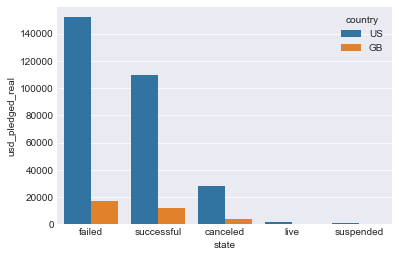

In [ ]:
status_freq_multi = df_new[(df_new['country'] == 'US')|(df_new['country'] == 'GB')].groupby(['state','country']).count()['usd_pledged_real'].sort_values(ascending=False).reset_index()
sns.barplot(x=status_freq_multi['state'],y=status_freq_multi['usd_pledged_real'],orient='v',hue=status_freq_multi['country'])

Dari hasil grafik diatas dapat kita lihat bahwa funding terbesar yang didapatkan diantara 2 negara adalah 'US', walaupun dengan tingakatan 'failed' lebih besar daripada 'successful'.

Dari hal ini kita akan meneliti lebih lanjut perihal analis dari 'country' 'US'.

In [ ]:
#Variable baru dari data US
df_US = df_new.loc[
    (df_new['country']=='US')
][['ID','name','main_category','usd_goal_real','usd_pledged_real','backers','state']]

df_US.sample(5)

,ID,name,main_category,usd_goal_real,usd_pledged_real,backers,state
219428,21177179,Gridlock: A New Sci-Fi Novel,Publishing,3850.0,11.0,2,failed
230584,242191904,The Mountain Revolution,Music,10000.0,60.0,4,failed
84554,1429977985,Track & Bliss- Fitness and Fashion for everyda...,Fashion,20000.0,20160.0,86,successful
110201,155995402,Habitué,Fashion,4000.0,25.0,1,failed
78625,1400131281,"""One Way - Mag"" (Gay Digital Mag) - Going to P...",Publishing,5600.0,100.0,1,failed


Dari dataset **df_US** yang sudah dibuat, kita akan membandingkan jumlah pada setiap **main_category** dengan banyak project yang ada.

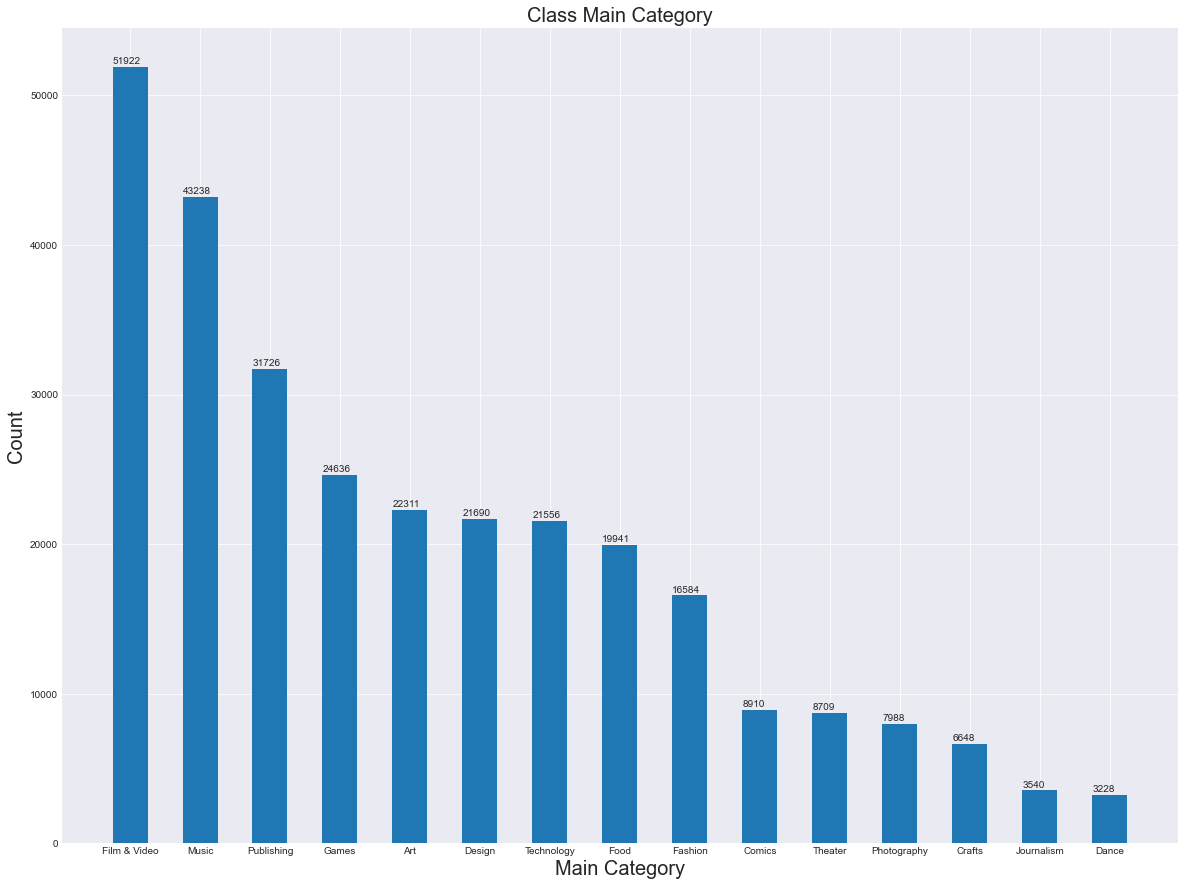

In [ ]:
#Visualisasi jumlah dari kolom 'main_category'

fig = plt.figure(figsize=(20, 15))
barWidth= 0.5
class_category = df_US['main_category'].value_counts().to_dict()
x = class_category.keys()
y = class_category.values()
plot1 = plt.bar(x, y, width=barWidth)
plt.title('Class Main Category',  fontsize = '20')
plt.xlabel('Main Category', fontsize = '20')
plt.ylabel('Count', fontsize = '20')

for bar in plot1:
    plt.annotate(bar.get_height(),xy=(bar.get_x(), bar.get_height()+200,), fontsize=10)

Dari data diatas dapat dilihat bawah category project yang paling banyak adalah **Film & Video**

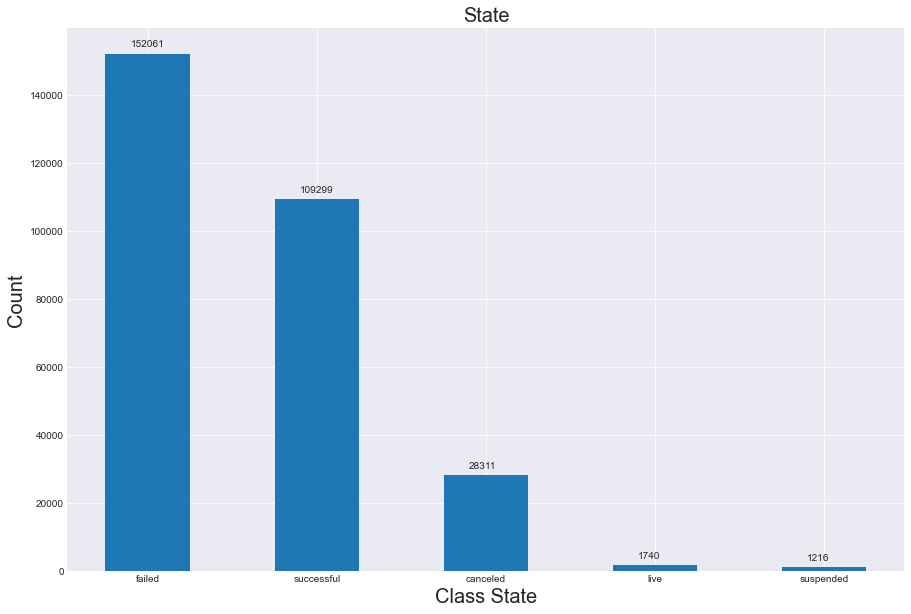

In [ ]:
#Visualisasi status project pada negara US
fig = plt.figure(figsize=(15, 10))
barWidth= 0.5
class_state = df_US['state'].value_counts().to_dict()
x = class_state.keys()
y = class_state.values()
plot2 = plt.bar(x, y, width=barWidth)
plt.title('State', fontsize = '20')
plt.xlabel('Class State', fontsize = '20')
plt.ylabel('Count', fontsize = '20')
for bar in plot2:
    plt.annotate(bar.get_height(),xy=(bar.get_x() + 0.15, bar.get_height()+2000,), fontsize=10)

Dari hasil diatas dapat diketahui jumlah project yang gagal di negara US lebih banyak dari tingkat keberhasilnnya.

## V. Measure of Central Tendency

*Measure of Central Tendency* adalah untuk mendapatkan nilai titik tengah pada data atau nilai khas dari kumpulan data.
Ada tiga ukuran utama tendensi sentral:

- **Mean** : jumlah nilai dalam kumpulan data dibagi dengan jumlah keseluruhan
- **Mode** : nilai yang sering muncul pada suatu Distribusi
- **Median** : nilai tengah dalam distribusi


In [ ]:
#Mencari central tendency dari 'usd_pledge_real' dari country 'US'

print('usd_pledged_real')
print()
print ('Min: ' + str(df_US['usd_pledged_real'].min()))
print ('Mode: ' + str(df_US['usd_pledged_real'].mode()[0]))
print ('Median: ' + str(df_US['usd_pledged_real'].median()))
print ('Mean: ' + str(df_US['usd_pledged_real'].mean()))
print ('Max: ' + str(df_US['usd_pledged_real'].max()))

usd_pledged_real

Min: 0.0
Mode: 0.0
Median: 725.0
Mean: 9670.19304951369
Max: 20338986.27


Dari hasil diatas dapat dilihat nilai mean > dari median dan menunjukkan *positif skew distribution* ,*right skewed*, dan dari nilai min dan max memiliki jarak yang besar maka mengindikasikan tidak normal distribusi.

In [ ]:
#Mencari central tendency dari 'usd_goal_real' dari country 'US' 

print('usd_goal_real')
print()
print ('Min: ' + str(df_US['usd_goal_real'].min()))
print ('Mode: ' + str(df_US['usd_goal_real'].mode()[0]))
print ('Median: ' + str(df_US['usd_goal_real'].median()))
print ('Mean: ' + str(df_US['usd_goal_real'].mean()))
print ('Max: ' + str(df_US['usd_goal_real'].max()))


usd_goal_real

Min: 0.01
Mode: 5000.0
Median: 5250.0
Mean: 44034.969705358664
Max: 100000000.0


Dari hasil diatas dapat dilihat **usd_goal_real** memiliki nilai *mean* yang lebih besar dikarenakan besaran dari data set. menjadikan *positive skew distribution* dan menunjukkan *right skewed*, dan dari nilai min dan max memiliki jarak yang besar maka mengindikasikan tidak normal distribusi.

## VI. Measure of Variance

Pengukuran variasi statistik dari kumpulan data, dan terdapat 4 pengukuran variabilitas yang digunakan :
- Range : perbedaan jarak nilai terendah adn tertinggi
- Variance : perbedaan kuadrat rata-rata dari nilai-nilai dari mean
- Standar deviasi : berguna untuk mendapatkan nilai rentang data 
- Interquartile Range : kisaran tengah distribusi

In [ ]:
#Mencari pengukuran variasi dari 'usd_pledged_real' dari country 'US' 

print('usd_pledged_real')
print()
print('Range : ', str(df_US['usd_pledged_real'].max() - df_US['usd_pledged_real'].min()))
print('1st Quartile : ', str(df_US['usd_pledged_real'].quantile(0.25)))
print('3rd Quartile : ', str(df_US['usd_pledged_real'].quantile(0.75)))
print('Variance : ', str(df_US['usd_pledged_real'].var()))
print ('Std. Deviation: ' + str(df_US['usd_pledged_real'].std()))


usd_pledged_real

Range :  20338986.27
1st Quartile :  41.0
3rd Quartile :  4370.0
Variance :  9866334012.454746
Std. Deviation: 99329.421685897


In [ ]:
#Mencari pengukuran variasi dari 'usd_goal_real' dari country 'US' 

print('usd_goal_real')
print()
print('Range : ', str(df_US['usd_goal_real'].max() - df_US['usd_goal_real'].min()))
print('1st Quartile : ', str(df_US['usd_goal_real'].quantile(0.25)))
print('3rd Quartile : ', str(df_US['usd_goal_real'].quantile(0.75)))
print('Variance : ', str(df_US['usd_goal_real'].var()))
print ('Std. Deviation: ' + str(df_US['usd_goal_real'].std()))

usd_goal_real

Range :  99999999.99
1st Quartile :  2000.0
3rd Quartile :  15000.0
Variance :  1228488436994.8774
Std. Deviation: 1108371.9759155216


## VII. Hypothesis Testing

Dalam hal pengujian yang akan kami lakukan akan melibatkan dari bagian **usd_pledged_real** dan **usd_goal_real** untuk mengetahui statistik **main_category**  dengan **state** .

In [ ]:
#Membuat log variabel dari 'usd_pledged_real'
log_pledged = np.log(df_US['usd_pledged_real'])
log_goal = np.log(df_US['usd_goal_real'])


c:\Users\TheSevenS\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


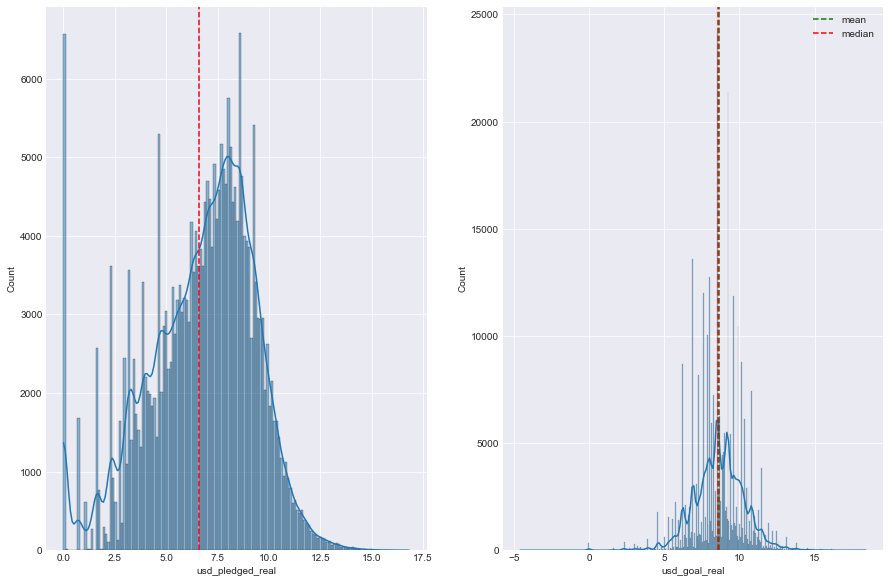

In [ ]:
#Plotting distribusi pada graphic dari 'usd_pledged_real' & 'usd_goal_real'
fig, ax = plt.subplots(ncols=2,figsize=(15, 10))

sns.histplot(log_pledged, kde=True, ax=ax[0])
ax[0].axvline(log_pledged.mean(), linestyle='dashed', label='mean', color='green')
ax[0].axvline(log_pledged.median(), linestyle='dashed', label='median', color='red')

sns.histplot(log_goal, kde=True, ax=ax[1])
ax[1].axvline(log_goal.mean(), linestyle='dashed', label='mean', color='green')
ax[1].axvline(log_goal.median(), linestyle='dashed', label='median', color='red')

plt.legend()
plt.show()

Dari hasil grafik diatas yang kita dapatkan dapat diasumsikan bahwa log **usd_goal_real** memiliki distribusi normal.

In [ ]:
#Membuat log dataframe dari 'usd_goal_real'
df_US_log = df_US[['ID', 'name', 'main_category', 'usd_goal_real', 'state']]
df_US_log.insert(4, 'usd_goal_log', log_goal)

df_US_log.head(10)

,ID,name,main_category,usd_goal_real,usd_goal_log,state
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,30000.0,10.308953,failed
2,1000004038,Where is Hank?,Film & Video,45000.0,10.714418,failed
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.0,8.517193,failed
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,19500.0,9.878170,canceled
5,1000014025,Monarch Espresso Bar,Food,50000.0,10.819778,successful
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,1000.0,6.907755,successful
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Food,25000.0,10.126631,failed
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Design,125000.0,11.736069,canceled
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,65000.0,11.082143,canceled
11,100005484,Lisa Lim New CD!,Music,12500.0,9.433484,successful


In [ ]:
#Mengetahui nilai mean dari setiap value "main_category"
df_US_log.groupby('main_category')['usd_goal_log'].mean().sort_values(ascending=False)

main_category
Technology      9.726288
Design          9.187437
Food            9.007378
Film & Video    8.933364
Games           8.931626
Fashion         8.563846
Journalism      8.478189
Publishing      8.346307
Theater         8.257394
Music           8.247570
Photography     8.195528
Dance           8.162112
Comics          8.095929
Art             7.919961
Crafts          7.691644
Name: usd_goal_log, dtype: float64

Dari hasil diatas dapat disimpulkan terdapat 2 pasang yang memiliki nilai mean hampir sama, yaitu antara **Film & Video** dengan **Games**.

**Mathematical Notation**

Claim : rata-rata dari kategori **Film & Video** dengan **Games**.

- H0 : μ_Games = μ_Film & Videos
- H1 : μ_Games != μ_Film & Videos


Pada kali ini saya akan menjalankan Hypothesis Testing untuk mengetahui nilai yang berbeda atau tidak, dengan membandingkan mean value antara kategori, dan metode yang digunakan adalah T- test dengan 2 sampel.

In [ ]:
#Mempersiapkan variabel
games = df_US_log[df_US_log['main_category']=='Games']
film = df_US_log[df_US_log['main_category']=='Film & Video']


In [ ]:
# t-test 2 sample 2 tailed
t_stat, p_val = stats.ttest_ind(games['usd_goal_log'], film['usd_goal_log'])

#the p-value isn't divided by 2 since the output is two-sided p-value
print('Probability value : ', p_val)
print('t-statistics : ', t_stat)

Probability value :  0.8948646188674615
t-statistics :  -0.13215174071543667


In [ ]:
# Compare P_value with Level of Significance

p_val <= 0.05

False

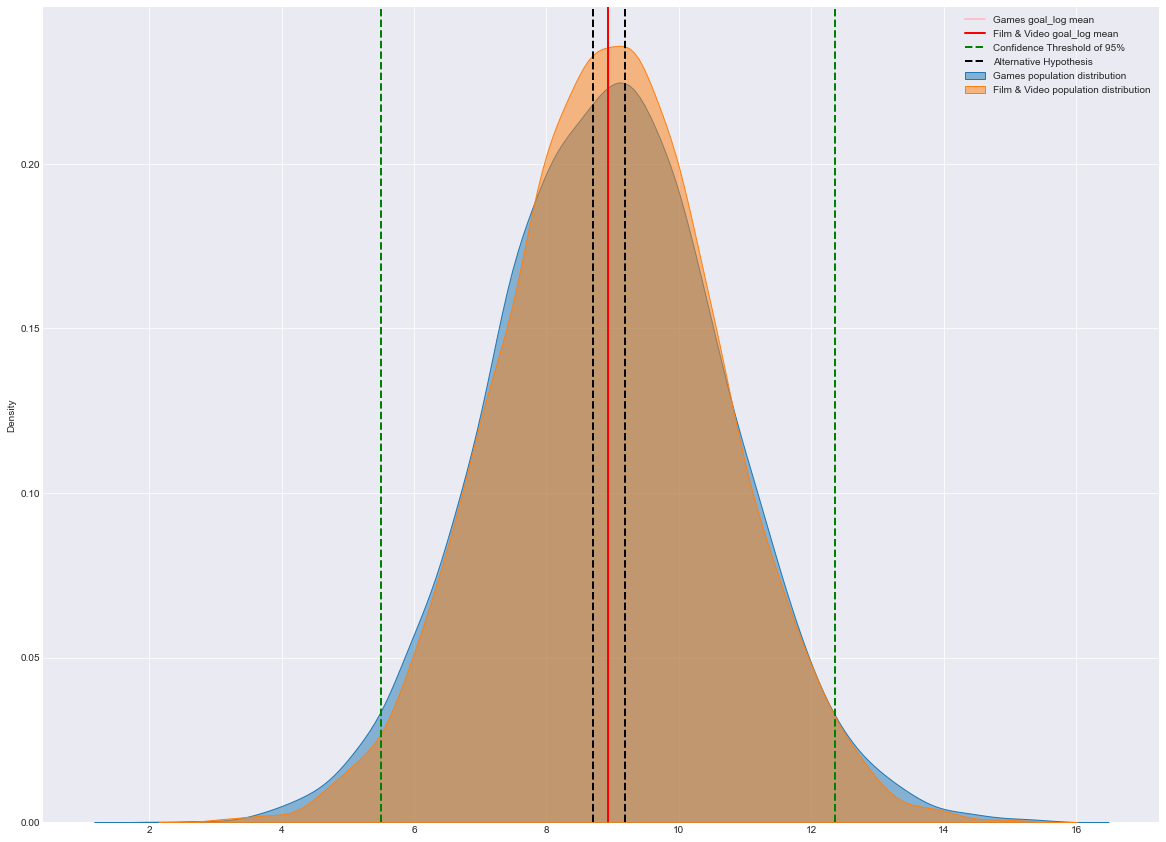

In [ ]:
#Sample data variabel
games_pop = np.random.normal(games['usd_goal_log'].mean(), games['usd_goal_log'].std(),10000)
film_pop = np.random.normal(film['usd_goal_log'].mean(), film['usd_goal_log'].std(),10000)

# confidence interval
ci = stats.norm.interval(0.95, games['usd_goal_log'].mean(), games['usd_goal_log'].std())

plt.figure(figsize=(20,15))
sns.kdeplot(games_pop, label='Games population distribution', fill='blue', alpha=0.5)
sns.kdeplot(film_pop, label='Film & Video population distribution', fill='orange' , alpha=0.5)

#Membuat grafik berdasarkan nilai mean dari data kategori 'film' & 'games'
plt.axvline(games['usd_goal_log'].mean(), color='pink', linewidth=2, label='Games goal_log mean')
plt.axvline(film['usd_goal_log'].mean(), color='red',  linewidth=2, label='Film & Video goal_log mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='Confidence Threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(games_pop.mean() + t_stat * games_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(film_pop.mean() - t_stat * film_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()
plt.show()

Dari hasil yang kita dapatkan diatas bahwa p_val lebih besar daripada nilai a. Dan dari grafik diatas dapat dikatakan bahwa terdistribusi normal dengan nilai **Confidence threshold of 95%**. Dan berdasarkan nilai ini kita gagal menolak **null hypothesis** pada nilai mean dari kategori **Games & Film**.

## VII. Conclusion

Dari kesimpulan yang kita dapatkan dari Descriptive Statistic, menunjukkan bahwa Skewed distribution, dikarenakan nilai Mean yang lebih besar daripada nilan Median.

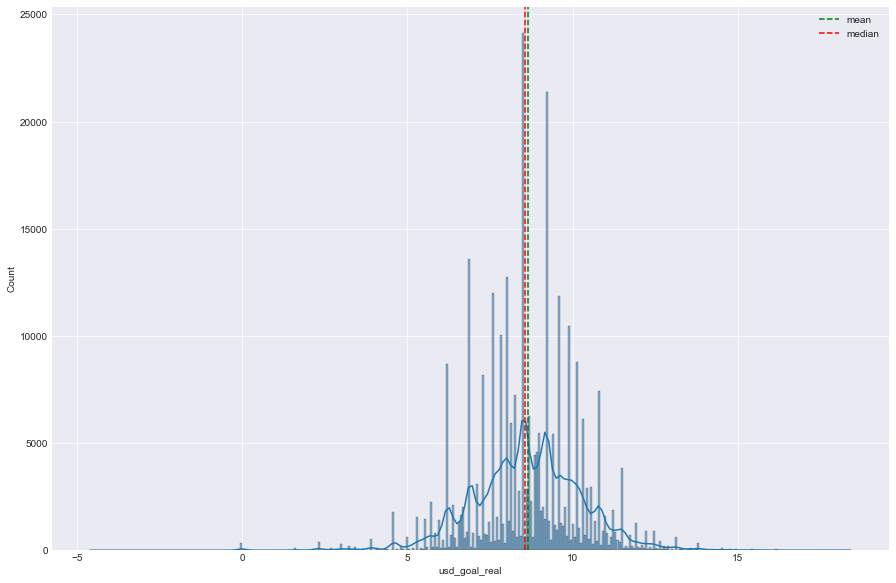

In [ ]:
#Plotting distribusi pada graphic dari 'usd_pledged_real' & 'usd_goal_real'
fig, ax = plt.subplots(figsize=(15, 10))

sns.histplot(log_goal, kde=True, ax=ax)
ax.axvline(log_goal.mean(), linestyle='dashed', label='mean', color='green')
ax.axvline(log_goal.median(), linestyle='dashed', label='median', color='red')

plt.legend()
plt.show()

Grafik diatas membuktikkan bahwa nilai usd_goal_real terdistribusi normal.

**Infrential Statistic**

Dari nilai usd_goal_real yang sudah diubah membuktikan bahwa terdistribusi normal. Dengan pemilihan kategori pada kolom 'main_category' yang memiliki nilai mean paling mirip untuk di uji coba dalam **Hypothesis testing** adalah kategori **Games & Film**. 

In [ ]:
#Menampilkan nilai mean dari kategori games & film
print('Mean games : ',games['usd_goal_log'].mean())
print('Mean film : ',film['usd_goal_log'].mean())

Mean games :  8.93162582527567
Mean film :  8.933363845893233


In [ ]:
#Menampilkan p_val & t_val dari kategori games & film 
print('Probability value : ', p_val)
print('t-statistics : ', t_stat)

Probability value :  0.8948646188674615
t-statistics :  -0.13215174071543667


Dari hasil yang kita dapatkan diatas bahwa p_val lebih besar daripada nilai a. Dan dari grafik diatas dapat dikatakan bahwa terdistribusi normal dengan nilai **Confidence threshold of 95%**. Dan berdasarkan nilai ini kita gagal menolak **null hypothesis** pada nilai mean dari kategori **Games & Film**, dikarenakan rata-rata nilai setelah dilakukan data cleaning sama.